In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("jobs_dataset_with_features.csv")

In [3]:
df.shape

(1615940, 2)

In [4]:
df.head()

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...


In [4]:
# Dropping classes with less than 6500 instances
min_count = 6500
role_counts = df['Role'].value_counts()
dropped_classes = role_counts[role_counts < min_count].index
filtered_df = df[~df['Role'].isin(dropped_classes)].reset_index(drop=True)

# Checking the updated role counts
filtered_df['Role'].value_counts()

Role
Interaction Designer          20580
Network Administrator         17470
User Interface Designer       14036
Social Media Manager          13945
User Experience Designer      13935
                              ...  
Benefits Coordinator           6839
Research Analyst               6830
Administrative Coordinator     6803
IT Support Specialist          6799
UI/UX Designer                 6743
Name: count, Length: 61, dtype: int64

C:\Users\nares\AppData\Local\Temp\ipykernel_29236\3205846250.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Role', palette='coolwarm')


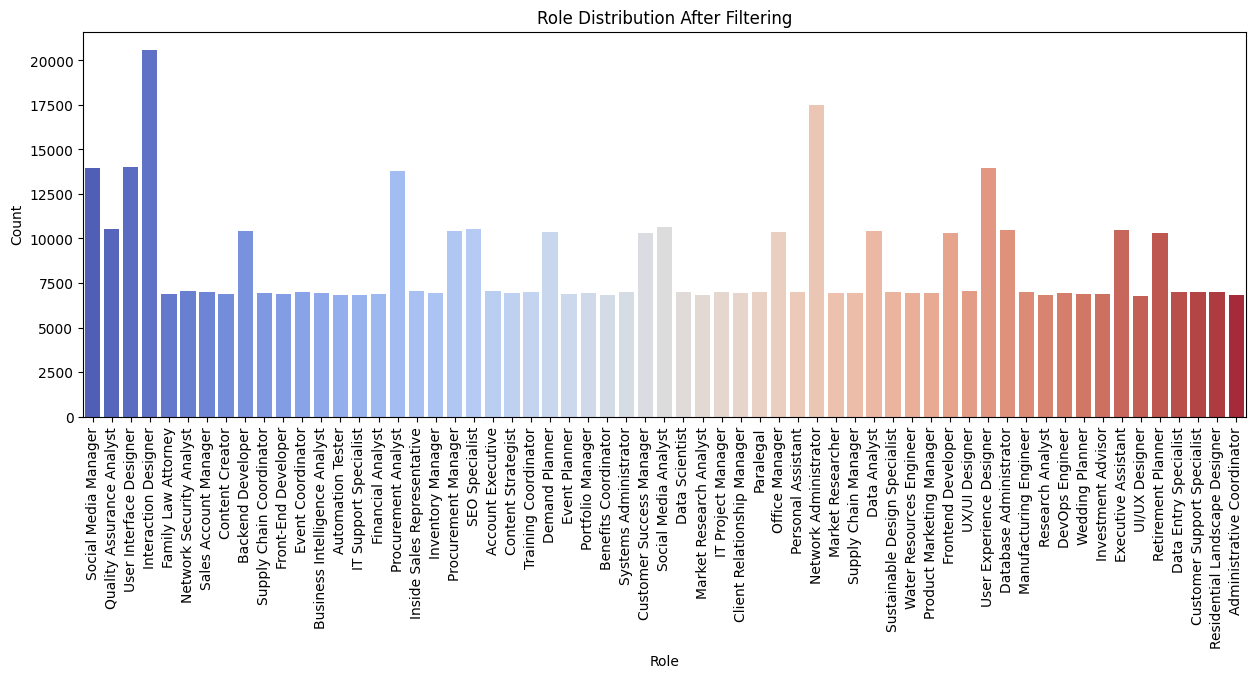

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(data=filtered_df, x='Role', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel("Role")
plt.ylabel("Count")
plt.title("Role Distribution After Filtering")
plt.show()

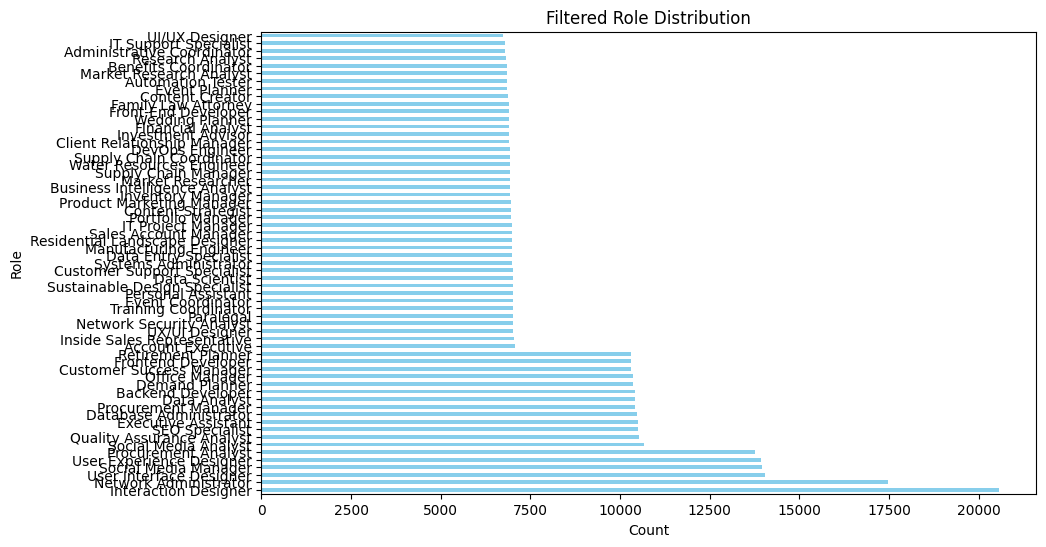

In [7]:
plt.figure(figsize=(10, 6))
filtered_df['Role'].value_counts().plot(kind='barh', color='skyblue')
plt.xlabel("Count")
plt.ylabel("Role")
plt.title("Filtered Role Distribution")
plt.show()


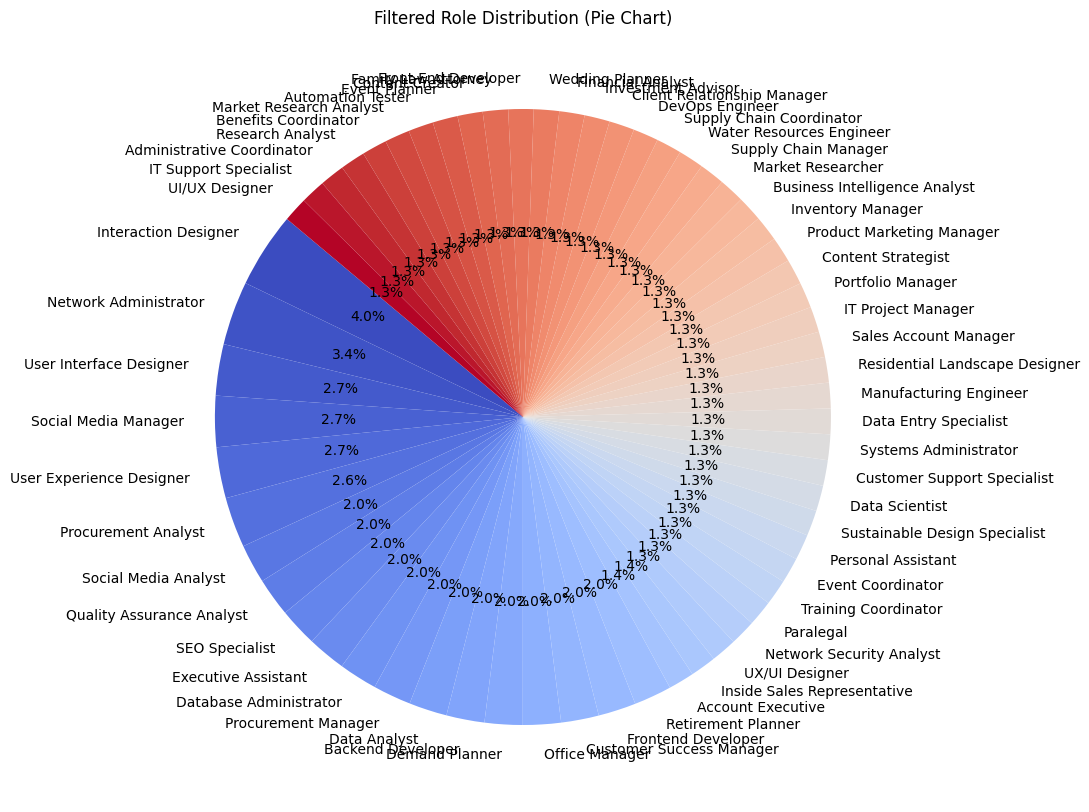

In [8]:
plt.figure(figsize=(10,10))
filtered_df['Role'].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap='coolwarm', startangle=140)
plt.ylabel("")
plt.title("Filtered Role Distribution (Pie Chart)")
plt.show()


C:\Users\nares\AppData\Local\Temp\ipykernel_29236\3778423193.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Role', palette='viridis', ax=axes[0])
C:\Users\nares\AppData\Local\Temp\ipykernel_29236\3778423193.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
C:\Users\nares\AppData\Local\Temp\ipykernel_29236\3778423193.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='Role', palette='coolwarm', ax=axes[1])
C:\Users\nares\AppData\Local\Temp\ipykernel_29236\3778423193.py:9: UserWarning: set_ticklabels() 

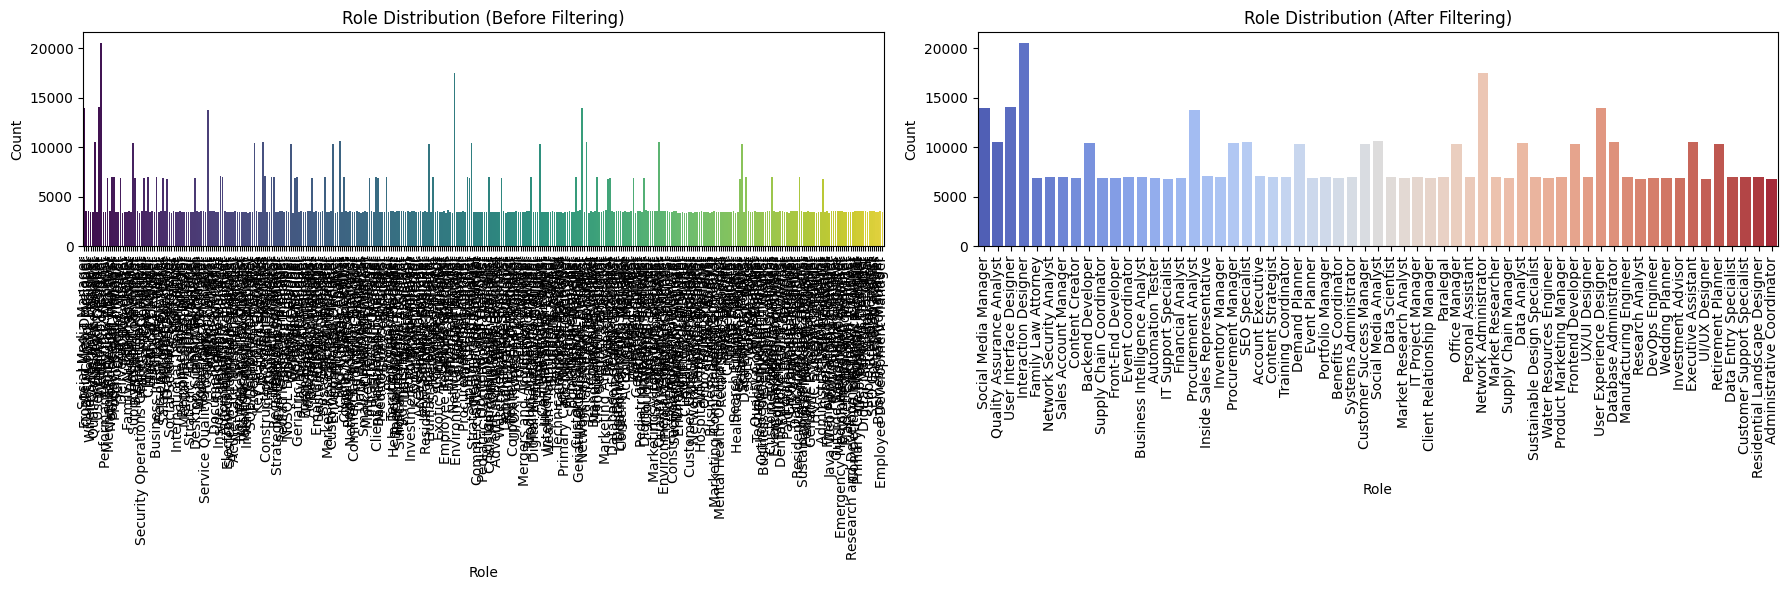

In [9]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(data=df, x='Role', palette='viridis', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_title("Role Distribution (Before Filtering)")
axes[0].set_xlabel("Role")
axes[0].set_ylabel("Count")

sns.countplot(data=filtered_df, x='Role', palette='coolwarm', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_title("Role Distribution (After Filtering)")
axes[1].set_xlabel("Role")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [6]:
len(filtered_df['Role'].value_counts())

61

In [7]:
df = filtered_df.sample(n=10000)

In [8]:
df.head()

,Role,Features
355674,Social Media Manager,3 to 15 Years Digital Marketing Specialist BA ...
159513,Database Administrator,3 to 13 Years Systems Administrator MCA Databa...
187559,User Experience Designer,4 to 15 Years UX/UI Designer B.Com User-center...
355265,Customer Support Specialist,2 to 15 Years Customer Success Manager MCA Cus...
463417,Office Manager,0 to 9 Years Executive Assistant M.Com Office ...


# TFIDF

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into features (X) and target (y)
X = df['Features']
y = df['Role']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [12]:
# RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy*100)

Test Accuracy: 99.9


# Recommendation

In [13]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def job_recommendation(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

In [14]:
# Example Usage
resume_file = """Objective:
A creative and detail-oriented Designer with a passion for visual communication and brand identity seeking opportunities to leverage design skills in a dynamic and collaborative environment.

Education:
- Bachelor of Fine Arts in Graphic Design, XYZ College, GPA: 3.7/4.0
- Diploma in Web Design, ABC Institute, GPA: 3.9/4.0

Skills:
- Proficient in Adobe Creative Suite (Photoshop, Illustrator, InDesign)
- Strong understanding of typography, layout, and color theory
- Experience in both print and digital design
- Ability to conceptualize and execute design projects from concept to completion
- Excellent attention to detail and time management skills

Experience:
Graphic Designer | XYZ Design Studio
- Created visually appealing graphics for various marketing materials, including brochures, flyers, and social media posts
- Collaborated with clients to understand their design needs and deliver creative solutions that align with their brand identity
- Worked closely with the marketing team to ensure consistency in brand messaging across all platforms

Freelance Designer
- Designed logos, branding materials, and website layouts for small businesses and startups
- Managed multiple projects simultaneously while meeting tight deadlines and maintaining quality standards
- Established and maintained strong client relationships through clear communication and exceptional service

Projects:
- Rebranding Campaign for XYZ Company: Led a team to redesign the company's logo, website, and marketing collateral, resulting in a 30% increase in brand recognition
- Packaging Design for ABC Product Launch: Developed eye-catching packaging designs for a new product line, contributing to a successful launch and positive customer feedback

Certifications:
- Adobe Certified Expert (ACE) in Adobe Illustrator
- Responsive Web Design Certification from Udemy

Languages:
- English (Native)
- Spanish (Intermediate)
"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: User Interface Designer


In [15]:
# Example Usage
resume_file = """Objective:
Dedicated and results-oriented Banking professional with a strong background in financial analysis and customer service seeking opportunities to contribute to a reputable financial institution. Eager to leverage expertise in risk management, investment strategies, and relationship building to drive business growth and client satisfaction.

Education:
- Bachelor of Business Administration in Finance, XYZ University, GPA: 3.8/4.0
- Certified Financial Analyst (CFA) Level I Candidate

Skills:
- Proficient in financial modeling and analysis using Excel, Bloomberg Terminal, and other financial software
- Extensive knowledge of banking products and services, including loans, mortgages, and investment products
- Strong understanding of regulatory compliance and risk management practices in the banking industry
- Excellent communication and interpersonal skills, with a focus on building rapport with clients and colleagues
- Ability to work efficiently under pressure and adapt to changing market conditions

Experience:
Financial Analyst | ABC Bank
- Conducted financial analysis and risk assessment for corporate clients, including credit analysis, financial statement analysis, and cash flow modeling
- Developed customized financial solutions to meet clients' needs and objectives, resulting in increased revenue and client retention
- Collaborated with cross-functional teams to identify new business opportunities and optimize existing processes

Customer Service Representative | DEF Bank
- Provided exceptional customer service to bank clients, addressing inquiries, resolving issues, and promoting banking products and services
- Processed transactions accurately and efficiently, including deposits, withdrawals, and account transfers
- Educated customers on various banking products and services, helping them make informed financial decisions

Internship | GHI Investments
- Assisted portfolio managers with investment research and analysis, including industry and company-specific research, financial modeling, and performance analysis
- Prepared investment presentations and reports for clients, highlighting investment opportunities and performance metrics
- Conducted market research and analysis to identify trends and opportunities in the financial markets

Certifications:
- Certified Financial Planner (CFP)
- Series 7 and Series 63 Securities Licenses

Languages:
- English (Native)
- Spanish (Proficient)

"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Financial Analyst


In [16]:
import pickle
pickle.dump(rf_classifier,open('models/rf_classifier_job_recommendation.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('models/tfidf_vectorizer_job_recommendation.pkl','wb'))

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
